# Training Deep Neural-Network with Pytorch for Digit Recognition 

In this notebook we are going to learn how to build deep Neural-Network using Pytorch. We will be using MNIST data set to train a deep neural-net that can classify hand-written digits from images. More specifically our learning goal for this tutorial will be as following,

1. How to load an existing data set in Pytorch
2. How to use *torch.nn.sequential* to build a deep neural network
3. How to setup data for forward pass through the neural-net

Each of the above steps will be impllemented in different cells.

In [1]:
# Import necessary packages
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import torch
import helper
import matplotlib.pyplot as plt

In [2]:
import torch
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

### We will build the following neural network

<img src="figures/mlp_mnist.png" width=600px>

### Start building the network

In [3]:
# # Hyperparameters for our network
# input_size = 784
# hidden_sizes = [128, 64]
# output_size = 10

# # Build a feed-forward network
# model = torch.nn.Sequential(torch.nn.Linear(input_size, hidden_sizes[0]),
#                       torch.nn.ReLU(),
#                       torch.nn.Linear(hidden_sizes[0], hidden_sizes[1]),
#                       torch.nn.ReLU(),
#                       torch.nn.Linear(hidden_sizes[1], output_size),
#                       torch.nn.Softmax(dim=1))
# print(model)

# # Define the loss
# # criterion = torch.nn.CrossEntropyLoss()
# criterion = torch.nn.NLLLoss()

# # Optimizers require the parameters to optimize and a learning rate
# optimizer = torch.optim.SGD(model.parameters(), lr=0.003)

In [4]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

# Define the loss
criterion = nn.NLLLoss()

# Get our data
images, labels = next(iter(trainloader))
# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our log-probabilities
logps = model(images)
# Calculate the loss with the logps and the labels
loss = criterion(logps, labels)

print(loss)

RuntimeError: output with shape [1, 28, 28] doesn't match the broadcast shape [3, 28, 28]

### Warmup with one batch of Data to perform a forward pass

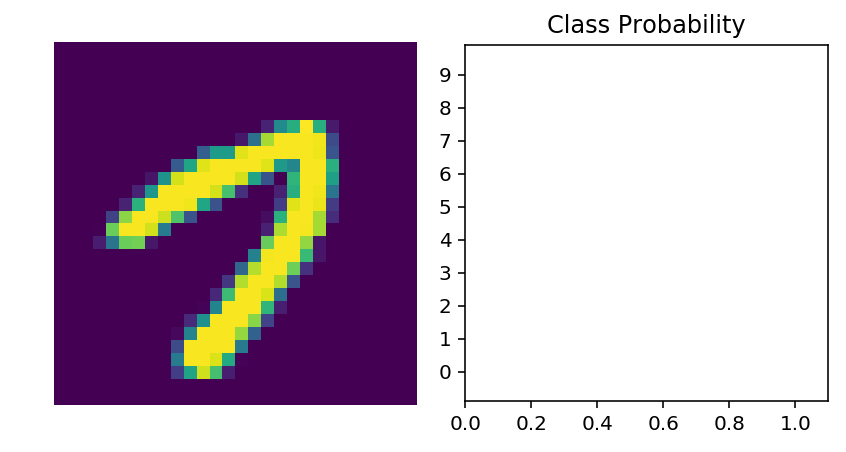

In [67]:
# Grab some data 
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels) 
images.resize_(images.shape[0], 1, 784)
# or images.resize_(images.shape[0], 1, 784) to automatically get batch size

# Forward pass through the network
img_idx = 0
ps = model.forward(images[img_idx,:])

img = images[img_idx]
helper.view_classify(img.view(1, 28, 28), ps)

### Train the network with training dataset

In [68]:
epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # TODO: Training pass
        optimizer.zero_grad()
        
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.0


KeyboardInterrupt: 

### Predict Digits
Now that we have a trained network, we can now start predicting data.

In [ ]:
images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model.forward(img)

# Output of the network are logits, need to take softmax for probabilities
ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps)